In [70]:
gdcar = 'https://drive.google.com/uc?export=download&id='+'https://drive.google.com/file/d/1FgOkodNDLO35AugimvJud7TSW-CSvUbt/view?usp=sharing'.split('/')[-2]
import pandas as pd
df = pd.read_csv(gdcar)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data Analysis

In [71]:
df.shape

(301, 9)

In [72]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [73]:
# Check for Missing Values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [74]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [75]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [76]:
# final_dataset = df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
# final_dataset.head()

In [81]:
fdf = df.drop('Car_Name',axis='columns',inplace=False)

In [82]:
# Creating a new feature - age of car
fdf['Current_Year']=2020
fdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [83]:
fdf['No_Year']=fdf['Current_Year']-fdf['Year']

In [84]:
final=fdf.drop(['Year','Current_Year'],axis='columns',inplace=False)
final.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [85]:
final.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
No_Year,-0.236141,0.047584,0.524342,0.182104,1.000000


In [86]:
# Convert category features using One Hot Encoding

final = pd.get_dummies(final,drop_first=True)
final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [87]:
final.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [88]:
import seaborn as sns

In [89]:
# sns.pairplot(fdf)

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

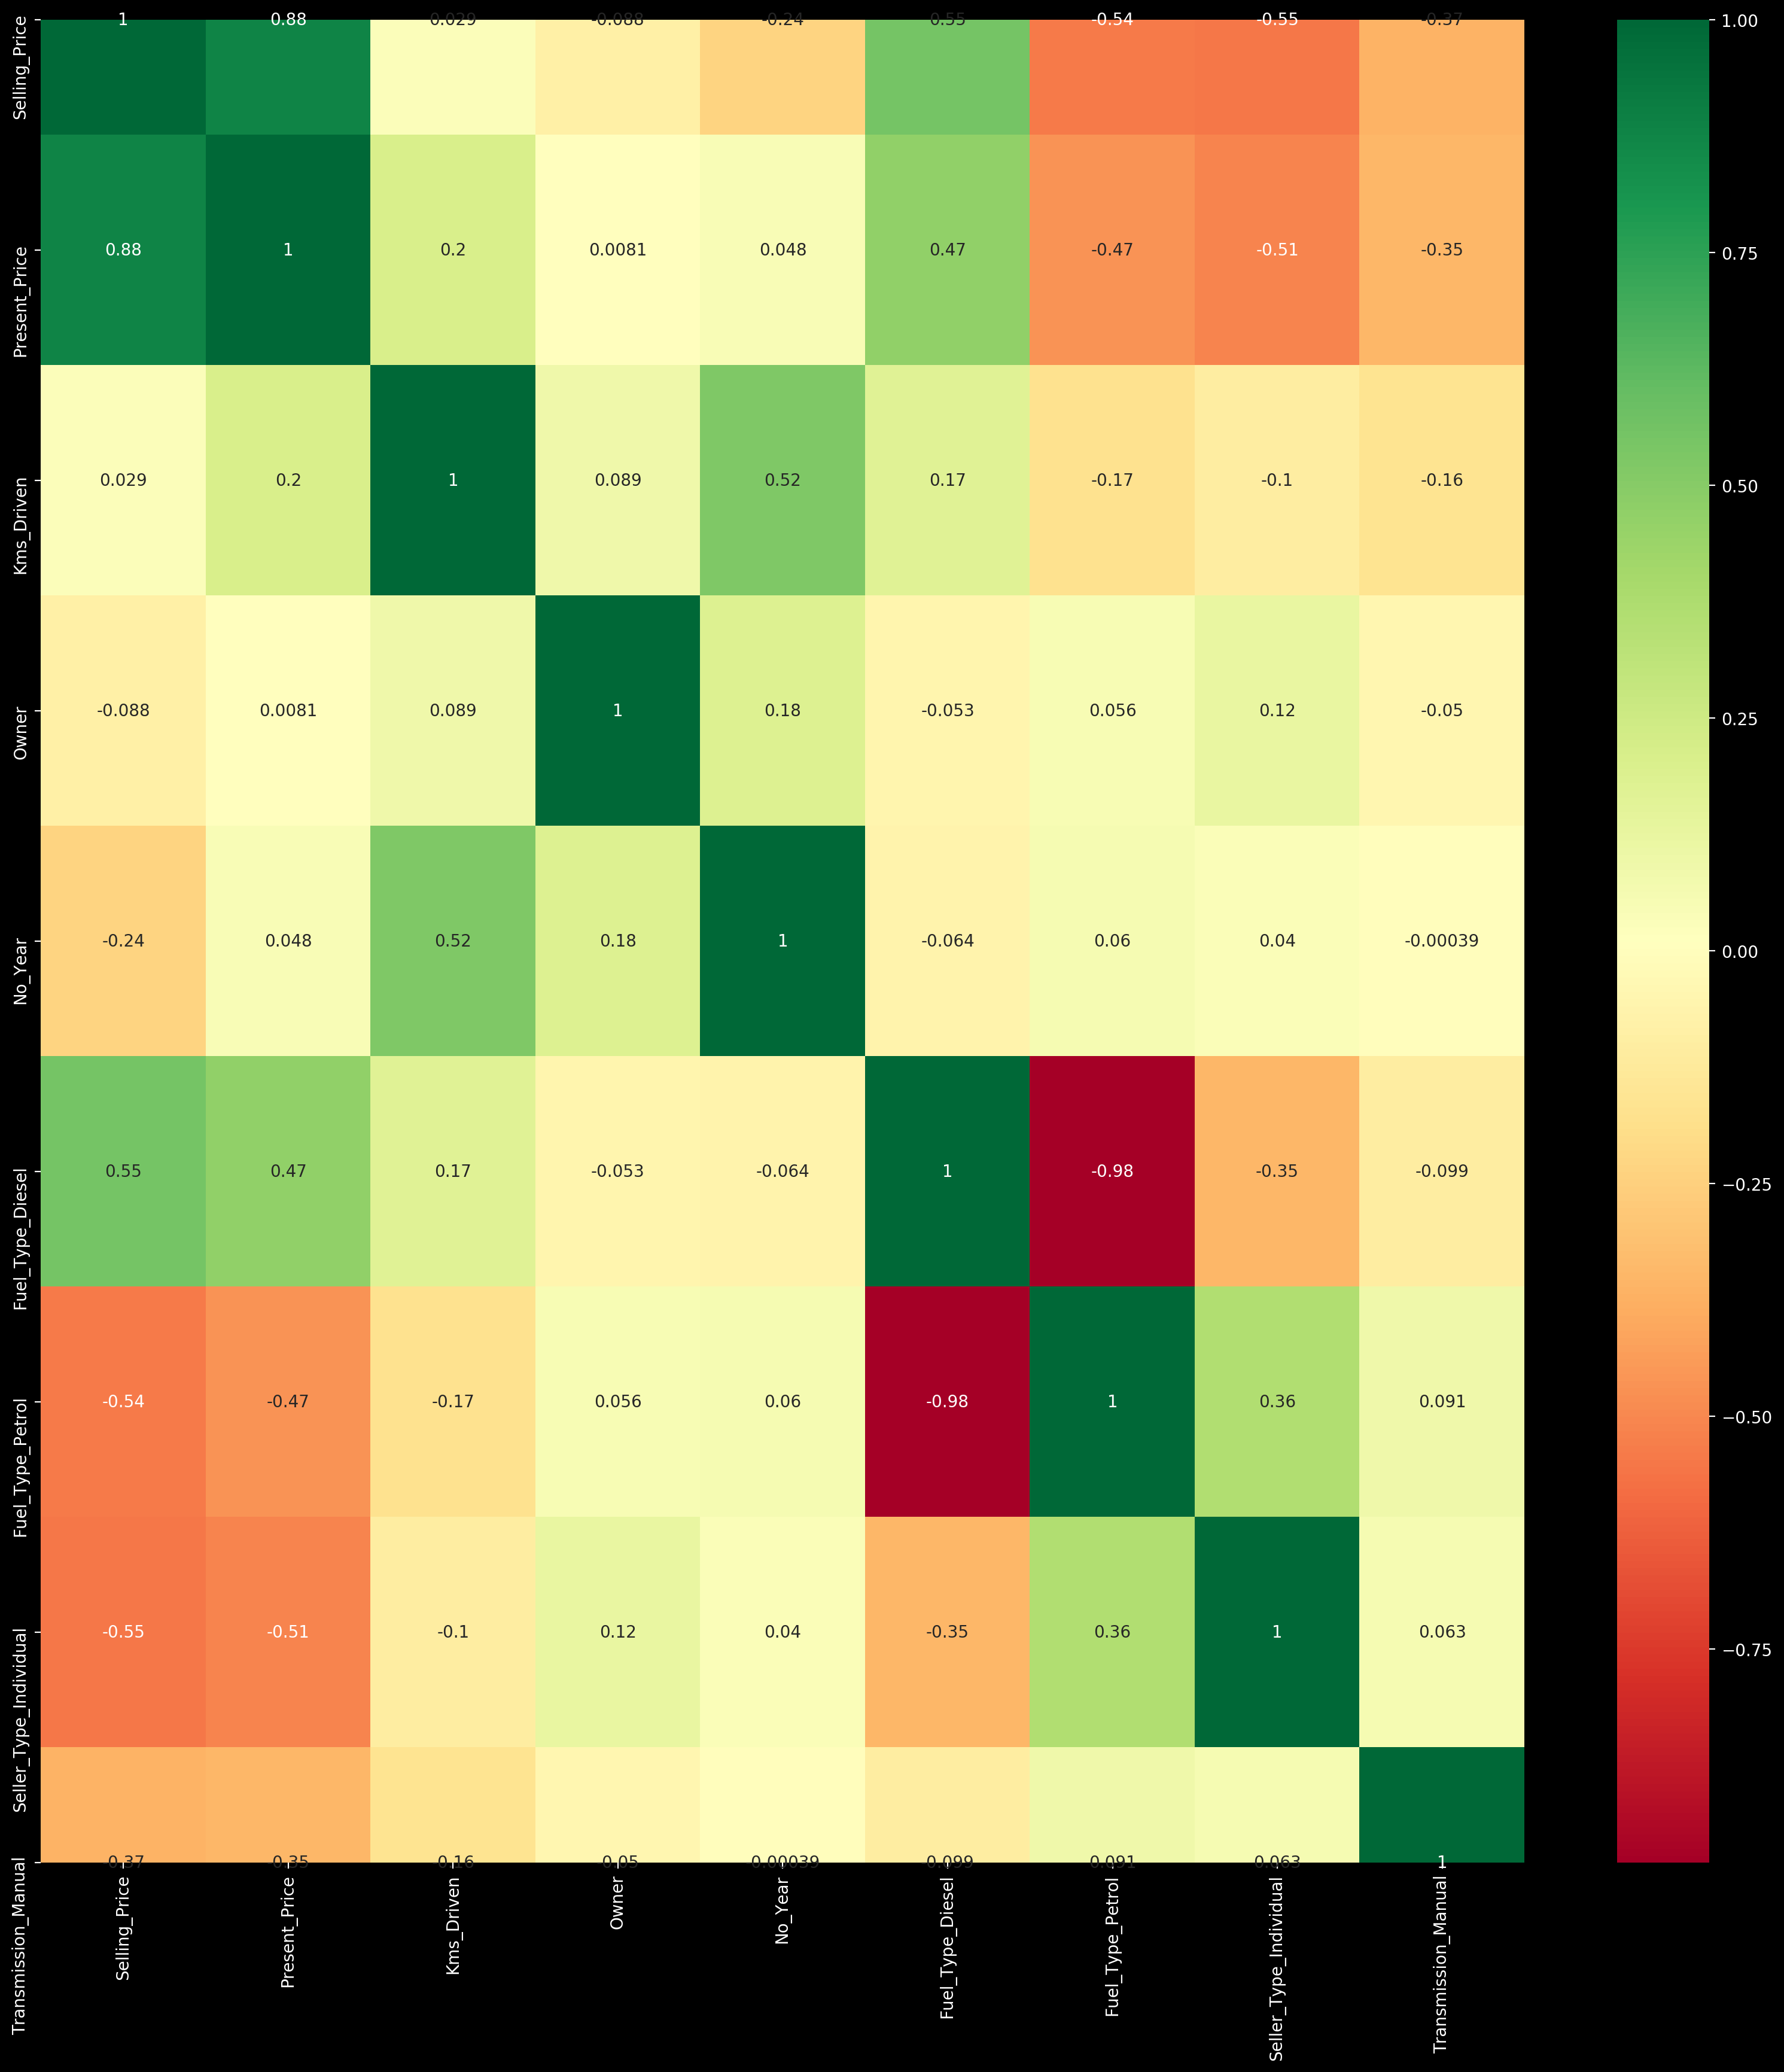

In [92]:
# Use pearson corrleation
corrmat=final.corr()
top_corr=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final[top_corr].corr(),annot=True,cmap="RdYlGn")

### Define X,Y and Train-Test Split

In [93]:
final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [96]:
x=final.iloc[:,1:]
y=final.iloc[:,0]

In [97]:
# Determine feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [98]:
print(model.feature_importances_)

[0.35860687 0.04208688 0.0008544  0.07628926 0.23545898 0.01150869
 0.1312806  0.14391432]


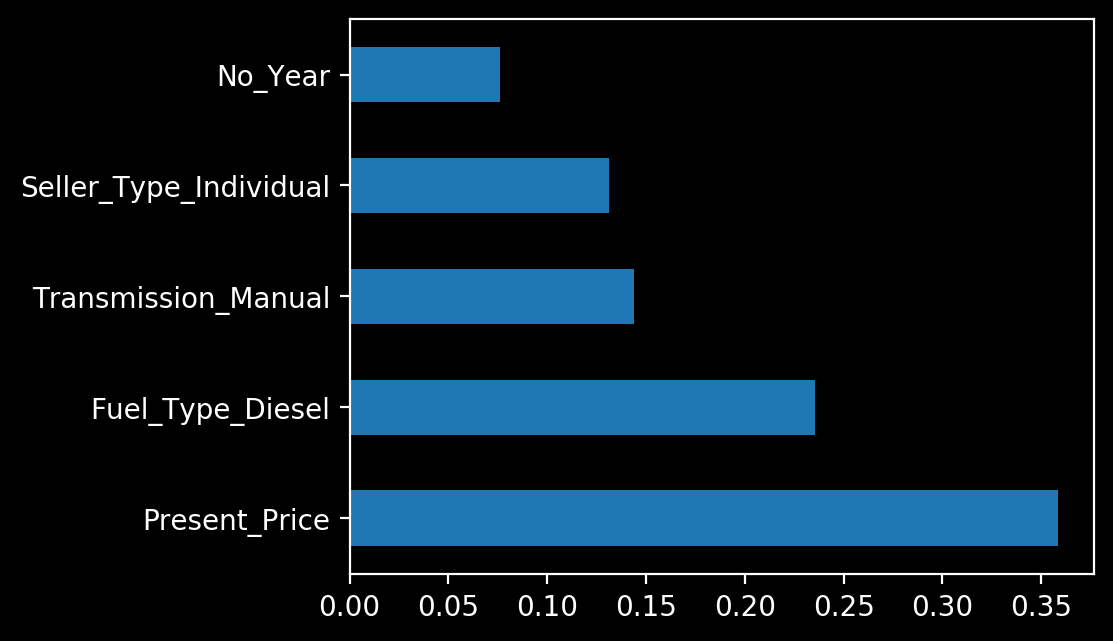

In [100]:
feat_importance = pd.Series(model.feature_importances_,index=x.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [109]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [110]:
x_train.shape

(240, 8)

In [119]:
# We wont scale the values since we will use Random Forest (Decision Tree)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [120]:
### Hyperparameters
import numpy as np
n_estimators = [int(x)for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [121]:
### Randomized Search CV
# Number of trees in Random Forest
n_estimators = [int(x)for x in np.linspace(start=100,stop=1200,num=12)]
# Number of features to consider in every splot
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [123]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [124]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [125]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [126]:
predictions = rf_random.predict(x_test)

In [127]:
predictions

array([ 5.32150694,  0.62554393,  5.31464393,  5.01420867,  3.82384077,
        2.77674182,  1.13801002,  1.1903052 ,  0.43631865,  4.97618831,
        1.21458083,  1.09666048,  2.87390766,  5.06466911,  2.95639269,
        8.68215018,  6.57892621,  7.17641294,  4.30055907,  0.22414895,
        0.34030431,  7.12907455,  0.28048693,  6.58945694,  0.43349735,
       15.98758364,  3.07736961,  0.56071338,  0.68359852,  0.50501328,
        0.25451113,  1.33002858,  1.17692176,  7.76930031,  0.70694621,
        4.54340758,  4.62711301,  0.49375675,  5.75794894, 11.67310111,
        0.30156541,  6.42619658, 20.28020451,  5.03206799,  4.46834929,
        0.84013053,  0.53352642,  9.54844142,  6.37526394,  5.66299862,
        2.95051188,  0.56430262,  0.4495563 ,  2.76002913,  0.24507102,
        3.89634916,  4.99280482,  0.70477809,  4.30187445,  2.96149261,
        1.13493543])

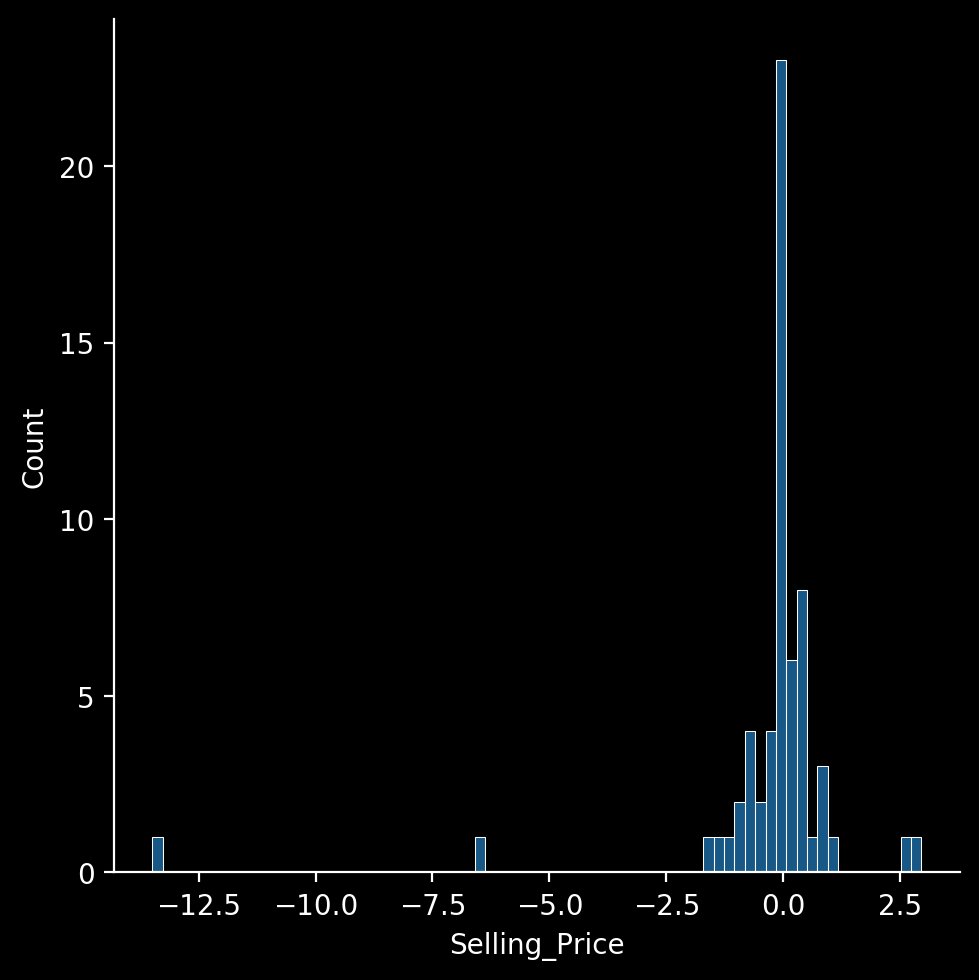

In [128]:
sns.displot(y_test-predictions)

In [129]:
import pickle

In [130]:
file = open('random_forest_regression_model','wb')
pickle.dump(rf_random,file)